# TCC

- Web Scaping com R
- Análise exploratória de dados
- Análise de sentimentos
- K-means machine leaning

##### Esse projeto tem o objetivo de coletar e análisar os dados de opinião de 30 Resorts do Estado da Bahia listados no site Tripadvisor, utilizando a linguagem R e as bibliotecas necessárias para a execução das etapas.

-------------------

### Etapa 1 - Carregando as bibliotecas

In [142]:
# Carregando as bibliotecas

library(rvest)
library(dplyr)
library(syuzhet)
library(RColorBrewer)
library(wordcloud)
library(tm) 
library(fpc)
library(ggplot2)
library(pander)

-------------------------

### Etapa 2 - Verificando o diretório de trabalho

In [7]:
getwd()

[1] "/Volumes/Pen do Ade/Outspoken Market"

In [8]:
setwd("/Volumes/Pen do Ade/Projetos")

-------------------
### Etapa 3 - Coleta de reviews online

In [9]:
link <- "https://www.tripadvisor.com/Hotels-g303251-State_of_Bahia-Hotels.html"


In [10]:
page <- read_html(link)

In [11]:
page

{html_document}
<html lang="en-US">
[1] <head>\n<meta http-equiv="content-type" content="text/html; charset=utf-8 ...
[2] <body class="rebrand_2017 js_logging desktop_web Hotels" id="BODY_BLOCK_J ...

In [12]:
.prominent

ERROR: Error in eval(expr, envir, enclos): objeto '.prominent' n~ao encontrado


In [13]:
nome_hotel <- page %>% html_nodes(".prominent") %>% html_text()

In [14]:
nome_hotel

[1] "      1. Hotel Deville Prime Salvador"                      
 [2] "      2. Gran Hotel Stella Maris Urban Resort & Conventions"
 [3] "      3. Hotel Bahia Do Sol"                                
 [4] "      4. Wish Hotel da Bahia"                               
 [5] "      5. Ibis Salvador Aeroporto Hangar"                    
 [6] "      6. Hotel Solar do Imperador"                          
 [7] "      7. Pousada Bahia Bacana"                              
 [8] "      8. Catussaba Resort Hotel"                            
 [9] "      9. Quality Hotel & Suites Sao Salvador"               
[10] "      10. Mercure Salvador Rio Vermelho"                    
[11] "      11. Fiesta Bahia Hotel"                               
[12] "      12. Hit Hotel"                                        
[13] "      13. Jardim Atlantico Beach Resort"                    
[14] "      14. Novotel Salvador Hangar Aeroporto Hotel"          
[15] "      15. Vila Gale Salvador"                               
[16] "      16. Salvador Business & Flat"                         
[17] "      17. Casa Blanca Park Hotel"                           
[18] "      18. Ibis Salvador Rio Vermelho"                       
[19] "      19. Grande Hotel Da Barra"                            
[20] "      20. Rede Andrade Express"                             
[21] "      21. Novotel Salvador Rio Vermelho"                    
[22] "      22. Intercity Salvador"                               
[23] "      23. Malibu Plaza Hotel"                               
[24] "      24. Catussaba Business"                               
[25] "      25. The Hotel"                                        
[26] "      26. Intercity Salvador Aeroporto"                     
[27] "      27. Real Classic Bahia Hotel"                         
[28] "      28. Grand Palladium Imbassai Resort & Spa"            
[29] "      29. Opaba Praia Hotel"                                
[30] "      30. Monte Pascoal Praia Hotel"

In [17]:
qnt_reviews <- page %>% html_nodes(".review_count") %>% html_text()

In [18]:
qnt_reviews

[1] "904 reviews"    "2,937 reviews"  "433 reviews"    "2,526 reviews" 
 [5] "1,227 reviews"  "1,207 reviews"  "653 reviews"    "2,685 reviews" 
 [9] "882 reviews"    "2,877 reviews"  "1,356 reviews"  "554 reviews"   
[13] "1,937 reviews"  "900 reviews"    "2,030 reviews"  "269 reviews"   
[17] "340 reviews"    "2,683 reviews"  "1,132 reviews"  "235 reviews"   
[21] "1,626 reviews"  "1,830 reviews"  "259 reviews"    "429 reviews"   
[25] "540 reviews"    "313 reviews"    "137 reviews"    "14,630 reviews"
[29] "519 reviews"    "1,773 reviews"

In [19]:
hotel_links <- page %>% html_nodes(".prominent") %>% html_attr("href")  %>% paste("https://www.tripadvisor.com.br/", ., sep = "")

In [20]:
hotel_links

[1] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d299387-Reviews-Hotel_Deville_Prime_Salvador-Salvador_State_of_Bahia.html"                         
 [2] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d940061-Reviews-Gran_Hotel_Stella_Maris_Urban_Resort_Conventions-Salvador_State_of_Bahia.html"     
 [3] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d599298-Reviews-Hotel_Bahia_Do_Sol-Salvador_State_of_Bahia.html"                                   
 [4] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d3723986-Reviews-Wish_Hotel_da_Bahia-Salvador_State_of_Bahia.html"                                 
 [5] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d5588457-Reviews-Ibis_Salvador_Aeroporto_Hangar-Salvador_State_of_Bahia.html"                      
 [6] "https://www.tripadvisor.com.br//Hotel_Review-g303270-d472297-Reviews-Hotel_Solar_do_Imperador-Porto_Seguro_State_of_Bahia.html"                         
 [7] "https://www.tripadvisor.com.br//Hotel_Review-g488168-d5993747-Reviews-Pousada_Bahia_Bacana-Morro_de_Sao_Paulo_Ilha_de_Tinhare_State_of_Bahia.html"      
 [8] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d451460-Reviews-Catussaba_Resort_Hotel-Salvador_State_of_Bahia.html"                               
 [9] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d2422907-Reviews-Quality_Hotel_Suites_Sao_Salvador-Salvador_State_of_Bahia.html"                   
[10] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d299453-Reviews-Mercure_Salvador_Rio_Vermelho-Salvador_State_of_Bahia.html"                        
[11] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d306820-Reviews-Fiesta_Bahia_Hotel-Salvador_State_of_Bahia.html"                                   
[12] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d1832306-Reviews-Hit_Hotel-Salvador_State_of_Bahia.html"                                           
[13] "https://www.tripadvisor.com.br//Hotel_Review-g303262-d1888186-Reviews-Jardim_Atlantico_Beach_Resort-Ilheus_State_of_Bahia.html"                         
[14] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d5277966-Reviews-Novotel_Salvador_Hangar_Aeroporto_Hotel-Salvador_State_of_Bahia.html"             
[15] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d319067-Reviews-Vila_Gale_Salvador-Salvador_State_of_Bahia.html"                                   
[16] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d2284849-Reviews-Salvador_Business_Flat-Salvador_State_of_Bahia.html"                              
[17] "https://www.tripadvisor.com.br//Hotel_Review-g303270-d2645928-Reviews-Casa_Blanca_Park_Hotel-Porto_Seguro_State_of_Bahia.html"                          
[18] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d299452-Reviews-Ibis_Salvador_Rio_Vermelho-Salvador_State_of_Bahia.html"                           
[19] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d312120-Reviews-Grande_Hotel_Da_Barra-Salvador_State_of_Bahia.html"                                
[20] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d8133252-Reviews-Rede_Andrade_Express-Salvador_State_of_Bahia.html"                                
[21] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d300919-Reviews-Novotel_Salvador_Rio_Vermelho-Salvador_State_of_Bahia.html"                        
[22] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d3206271-Reviews-Intercity_Salvador-Salvador_State_of_Bahia.html"                                  
[23] "https://www.tripadvisor.com.br//Hotel_Review-g1932196-d2387230-Reviews-Malibu_Plaza_Hotel-Lauro_de_Freitas_State_of_Bahia.html"                         
[24] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d1738608-Reviews-Catussaba_Business-Salvador_State_of_Bahia.html"                                  
[25] "https://www.tripadvisor.com.br//Hotel_Review-g303272-d6929653-Reviews-The_Hotel-Salvador_State_of_Bahia.html"                                           
[26] "https://www.tripadvi

In [43]:
get_reviews <- function(hotel_links){
    hotel_page <- read_html(hotel_links)
    reviews <-  hotel_page %>% html_nodes(".H4 span") %>% html_text() %>% paste(sep =  ":", collapse = "//")
}

In [44]:
reviews <- sapply(hotel_links, FUN = get_reviews,simplify = TRUE, USE.NAMES = FALSE)

In [45]:
reviews

[1] "Compartilhar ////Compartilhar //\"Hotel impecável, funcionários muito atenciosos, atendimento excelente, ambiente limpo, confortável e arejado, comida ótima. A área de lazer muito boa, excelente piscina e ótima localização. Tudo maravilhoso.\" //estive a trabalho e negócios na cidade e o hotel me fez sentir de férias, devido ao atendimento e qualidade do hotel e quartos, indico aos que forem a trabalho, e também aos forem a passeio, pois tem uma excelente localização nas melhores praias de Salvador, aprovei.//Tudo maravilhoso. Recepção.quarto, café da manhã e excepcional.area verdade e picina muito bem cuidado. Nota 10 se melhorar estraga com certeza voltarei novamente e com a família e indicarei para os amigos. //Hotel excelente! Funcionários educados, quartos limpos, café da manhã ótimo.. estrutura ampla e bem cuidado. Único detalhe negativo é o estacionamento que é cobrado a diária para hóspede. Caso fique algumas diárias, praticamente uma diária ficará o valor de estacionamento. (Que é descoberto).//Sem dúvidas é o melhor hotel para ir com a família, filhos e até cachorro. Lugar de pessoas de classe, comida perfeita, funcionários super educados. Tem uma área de contato com a natureza que é o maior motivo para eu escolher o hotel, podemos fazer caminhada e relaxar.  Amo muito este hotel e vou pelo menos a cada 2 meses com a família.  Se tivesse banheira no banheiro seria então ainda mais perfeito kkk"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
 [2] "Compartilhar ////Compartilhar //Muito bom,  excelente atendimento e as instalações ótima

In [46]:
hoteis <- data.frame( nome_hotel,reviews)

In [25]:
View(hoteis)

nome_hotel                                                 
1        1. Hotel Deville Prime Salvador                      
2        2. Gran Hotel Stella Maris Urban Resort & Conventions
3        3. Hotel Bahia Do Sol                                
4        4. Wish Hotel da Bahia                               
5        5. Ibis Salvador Aeroporto Hangar                    
6        6. Hotel Solar do Imperador                          
7        7. Pousada Bahia Bacana                              
8        8. Catussaba Resort Hotel                            
9        9. Quality Hotel & Suites Sao Salvador               
10       10. Mercure Salvador Rio Vermelho                    
11       11. Fiesta Bahia Hotel                               
12       12. Hit Hotel                                        
13       13. Jardim Atlantico Beach Resort                    
14       14. Novotel Salvador Hangar Aeroporto Hotel          
15       15. Vila Gale Salvador                               
16       16. Salvador Business & Flat                         
17       17. Casa Blanca Park Hotel                           
18       18. Ibis Salvador Rio Vermelho                       
19       19. Grande Hotel Da Barra                            
20       20. Rede Andrade Express                             
21       21. Novotel Salvador Rio Vermelho                    
22       22. Intercity Salvador                               
23       23. Malibu Plaza Hotel                               
24       24. Catussaba Business                               
25       25. The Hotel                                        
26       26. Intercity Salvador Aeroporto                     
27       27. Real Classic Bahia Hotel                         
28       28. Grand Palladium Imbassai Resort & Spa            
29       29. Opaba Praia Hotel                                
30       30. Monte Pascoal Praia Hotel                        
   reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [26]:
str(hoteis)

'data.frame':	30 obs. of  2 variables:
 $ nome_hotel: chr  "      1. Hotel Deville Prime Salvador" "      2. Gran Hotel Stella Maris Urban Resort & Conventions" "      3. Hotel Bahia Do Sol" "      4. Wish Hotel da Bahia" ...
 $ reviews   : chr  "Compartilhar ;;Compartilhar ;\"Hotel impec<U+00E1>vel, funcion<U+00E1>rios muito atenciosos, atendimento excele"| __truncated__ "Compartilhar ;;Compartilhar ;Muito bom,  excelente atendimento e as instala<U+00E7><U+00F5>es <U+00F3>timas. Os"| __truncated__ "Compartilhar ;;Compartilhar ;Hotel organizado, limpo e tranquilo. Caf<U+00E9> muito bom! Destaque a cordialidad"| __truncated__ "Compartilhar ;;Compartilhar ;Para quem busca um bom hotel pr<U+00F3>ximo dos pontos tur<U+00ED>sticos como elev"| __truncated__ ...


In [27]:
length(hoteis)

[1] 2

In [28]:
# Carregue os pacotes
library(syuzhet)
library(RColorBrewer)
library(wordcloud)
library(tm)

In [29]:
hoteis$reviews <- as.character(hoteis$reviews)

----------------------------------------------

### Etapa 4 - Mineração de textos

In [30]:
hoteis_text <- hoteis$reviews

In [31]:
# Criando e limpando o corpus

hoteis_text_corpus <- VCorpus(VectorSource(hoteis_text))
hoteis_text_corpus <- tm_map(hoteis_text_corpus,
                                     content_transformer(function(x) iconv(x, to = 'UTF-8', sub = 'byte')))
hoteis_text_corpus <- tm_map(hoteis_text_corpus, content_transformer(tolower))
hoteis_text_corpus <- tm_map(hoteis_text_corpus, removePunctuation)
hoteis_text_corpus <- tm_map(hoteis_text_corpus, removeWords, stopwords("Portuguese"))

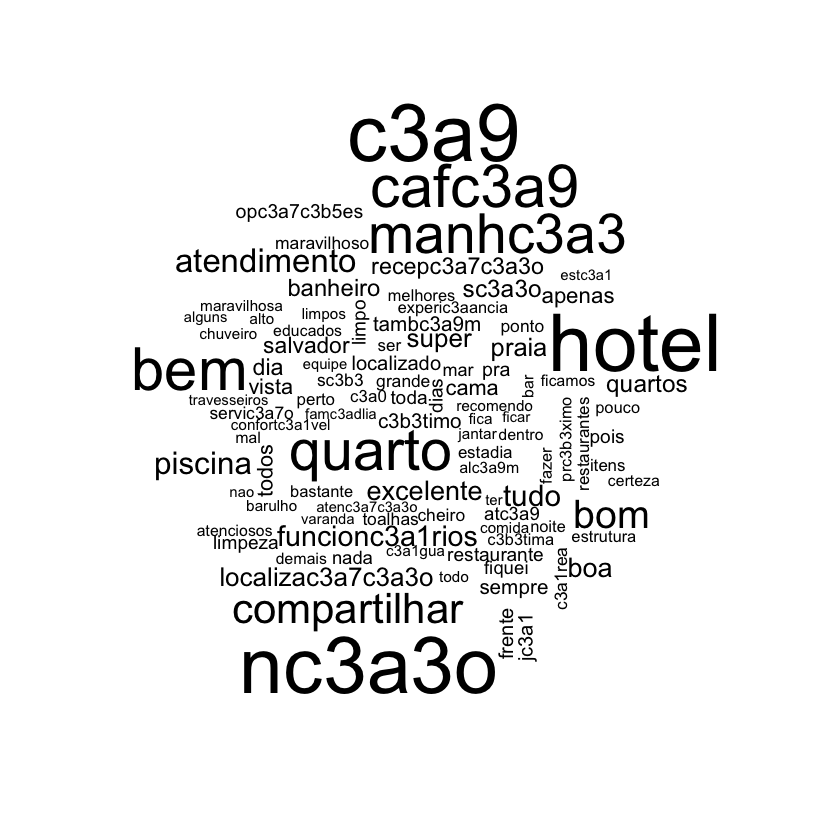

In [32]:
# Primeira visualização

wordcloud(hoteis_text_corpus, min.freq = 2, max.words =  100)

In [33]:
Sys.setlocale("LC_ALL","pt_BR.UTF-8")

[1] "pt_BR.UTF-8/pt_BR.UTF-8/pt_BR.UTF-8/C/pt_BR.UTF-8/C"

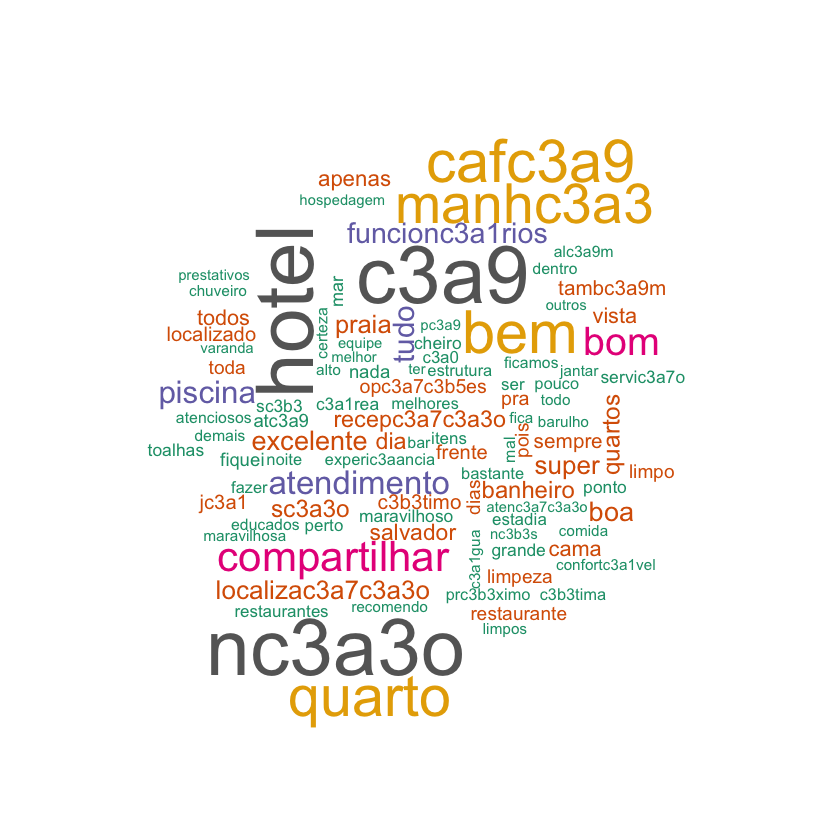

In [34]:
formatacao <- brewer.pal(8, "Dark2")

wordcloud(hoteis_text_corpus, min.freq =  2, max.words = 100, random.order = T, colors = formatacao)

In [35]:
# Limpeza do texto com a Document term Matrix

hoteis_dtm <- DocumentTermMatrix(hoteis_text_corpus)

hoteis_dtm

<<DocumentTermMatrix (documents: 30, terms: 2262)>>
Non-/sparse entries: 4721/63139
Sparsity           : 93%
Maximal term length: 47
Weighting          : term frequency (tf)

In [36]:
hoteis_frequencia <- colSums(as.matrix(hoteis_dtm))
length(hoteis_frequencia)
head(hoteis_frequencia, 10)

[1] 2262

0302  0802   100  1000   10h 15min   16h   1km   21h  22hs 
    1     1     1     1     1     1     1     1     1     1

In [37]:
# Removendo termos esparços

hoteis_dtms <- removeSparseTerms(hoteis_dtm, 0.85)
hoteis_dtms

<<DocumentTermMatrix (documents: 30, terms: 201)>>
Non-/sparse entries: 1803/4227
Sparsity           : 70%
Maximal term length: 17
Weighting          : term frequency (tf)

In [38]:
hoteis_frequencia <- colSums(as.matrix(hoteis_dtms))
length(hoteis_frequencia)

[1] 201

In [47]:
hoteis_frequencia

c3a9             hotel            nc3a3o               bem 
              131               131               129                93 
          cafc3a9            quarto          manhc3a3      compartilhar 
               93                89                85                60 
              bom       atendimento           piscina              tudo 
               55                43                40                37 
  funcionc3a1rios               boa         excelente localizac3a7c3a3o 
               35                32                32                30 
            super             praia           quartos            sc3a3o 
               30                29                27                27 
         banheiro               dia    recepc3a7c3a3o          salvador 
               26                25                25                24 
           apenas              cama             todos             vista 
               23                22                22                22 
         c3b3timo            sempre         tambc3a9m            frente 
               20                20                20                19 
            jc3a1        localizado      opc3a7c3b5es               pra 
               19                19                18                18 
             dias           limpeza             limpo              pois 
               17                17                17                17 
      restaurante              toda            atc3a9            fiquei 
               17                17                16                16 
             nada               mar           c3a1rea            cheiro 
               16                15                14                14 
           grande       maravilhoso             ponto             sc3b3 
               14                14                14                14 
       servic3a7o           toalhas              c3a0           estadia 
               14                14                13                13 
            perto      restaurantes               ser          bastante 
               13                13                13                12 
         c3b3tima         estrutura    experic3aancia             fazer 
               12                12                12                12 
         melhores             noite             pouco        prc3b3ximo 
               12                12                12                12 
          alc3a9m        atenciosos               bar           certeza 
               11                11                11                11 
           demais            dentro          educados           ficamos 
               11                11                11                11 
              mal              alto           barulho           c3a1gua 
               11                10                10                10 
         chuveiro            comida    confortc3a1vel              fica 
               10                10                10                10 
           jantar            limpos       maravilhosa         recomendo 
               10                10                10                10 
             todo             ainda            alguns     atenc3a7c3a3o 
               10                 9                 9                 9 
            conta            equipe           estc3a1             ficar 
                9                 9                 9                 9 
       hospedagem            melhor             muita            nc3b3s 
                9                 9                 9                 9 
           outros             pc3a9            pontos       prestativos 
                9                 9                 9                 9 
              ter      travesseiros           varanda       crianc3a7as 
                9                 9                 9                 8 
            custo              duas             havia             hc3a1

In [48]:
hoteis_frequencia <- sort(colSums(as.matrix(hoteis_dtms)), decreasing = T)
hoteis_frequencia

c3a9             hotel            nc3a3o               bem 
              131               131               129                93 
          cafc3a9            quarto          manhc3a3      compartilhar 
               93                89                85                60 
              bom       atendimento           piscina              tudo 
               55                43                40                37 
  funcionc3a1rios               boa         excelente localizac3a7c3a3o 
               35                32                32                30 
            super             praia           quartos            sc3a3o 
               30                29                27                27 
         banheiro               dia    recepc3a7c3a3o          salvador 
               26                25                25                24 
           apenas              cama             todos             vista 
               23                22                22                22 
         c3b3timo            sempre         tambc3a9m            frente 
               20                20                20                19 
            jc3a1        localizado      opc3a7c3b5es               pra 
               19                19                18                18 
             dias           limpeza             limpo              pois 
               17                17                17                17 
      restaurante              toda            atc3a9            fiquei 
               17                17                16                16 
             nada               mar           c3a1rea            cheiro 
               16                15                14                14 
           grande       maravilhoso             ponto             sc3b3 
               14                14                14                14 
       servic3a7o           toalhas              c3a0           estadia 
               14                14                13                13 
            perto      restaurantes               ser          bastante 
               13                13                13                12 
         c3b3tima         estrutura    experic3aancia             fazer 
               12                12                12                12 
         melhores             noite             pouco        prc3b3ximo 
               12                12                12                12 
          alc3a9m        atenciosos               bar           certeza 
               11                11                11                11 
           demais            dentro          educados           ficamos 
               11                11                11                11 
              mal              alto           barulho           c3a1gua 
               11                10                10                10 
         chuveiro            comida    confortc3a1vel              fica 
               10                10                10                10 
           jantar            limpos       maravilhosa         recomendo 
               10                10                10                10 
             todo             ainda            alguns     atenc3a7c3a3o 
               10                 9                 9                 9 
            conta            equipe           estc3a1             ficar 
                9                 9                 9                 9 
       hospedagem            melhor             muita            nc3b3s 
                9                 9                 9                 9 
           outros             pc3a9            pontos       prestativos 
                9                 9                 9                 9 
              ter      travesseiros           varanda       crianc3a7as 
                9                 9                 9                 8 
            custo              duas             havia             hc3a1

In [49]:
write.csv2(hoteis, "hoteis.csv", row.names = FALSE)

In [50]:
texto <- get_text_as_string("hoteis.txt")

In [51]:
texto_palavras <- get_tokens(texto)

In [180]:
length(texto_palavras)

[1] 10143

In [53]:
oracoes_vetor <- get_sentences(texto)
length((oracoes_vetor))

[1] 690

In [54]:
oracoes_vetor

[1] "\"nome_hotel\";\"reviews\" \"      1."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
  [2] "Hotel Deville Prime Salvador\";\"Compartilhar ////Compartilhar //\"\"Hotel impecável, funcionários muito atenciosos, atendimento excelente, ambiente limpo, confortável e arejado, comida ótima."                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  [3] "A área de lazer muito boa, excelente piscina e ótima localização."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
  [4] "Tudo maravilhoso.\""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
  [5] "\" //estive a trabalho e negócios na cidade e o hotel me fez sentir de férias, devido ao atendimento e qualidade do hotel e quartos, indico aos que forem a trabalho, e também aos forem a passeio, pois tem uma excelente localização nas melhores praias de Salvador, aprovei.//Tudo maravilhoso."                                                                                                                                                                                                                                                                                                                                              
  [6] "Recepção.quarto, café da manhã e excepcional."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
  [7] "area verdade e picina muito bem cuidado."                                                                                                                                                      

--------------

### Etapa 5 - Análise de sentimentos

In [55]:
sentimentos_df <- get_nrc_sentiment(texto_palavras, lang = "portuguese")

Warning message:
“`spread_()` was deprecated in tidyr 1.2.0.
Please use `spread()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


In [57]:
head(sentimentos_df)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [58]:
summary(sentimentos_df)

     anger           anticipation       disgust             fear         
 Min.   :0.000000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.000000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.000000   Median :0.0000   Median :0.00000   Median :0.000000  
 Mean   :0.008577   Mean   :0.0211   Mean   :0.01114   Mean   :0.009366  
 3rd Qu.:0.000000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :2.000000   Max.   :2.0000   Max.   :2.00000   Max.   :4.000000  
      joy             sadness           surprise            trust        
 Min.   :0.00000   Min.   :0.00000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.000000   Median :0.00000  
 Mean   :0.03638   Mean   :0.01548   Mean   :0.007493   Mean   :0.03717  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:0.00000  
 Max.   :7.00000   Max.   :4.00000   M

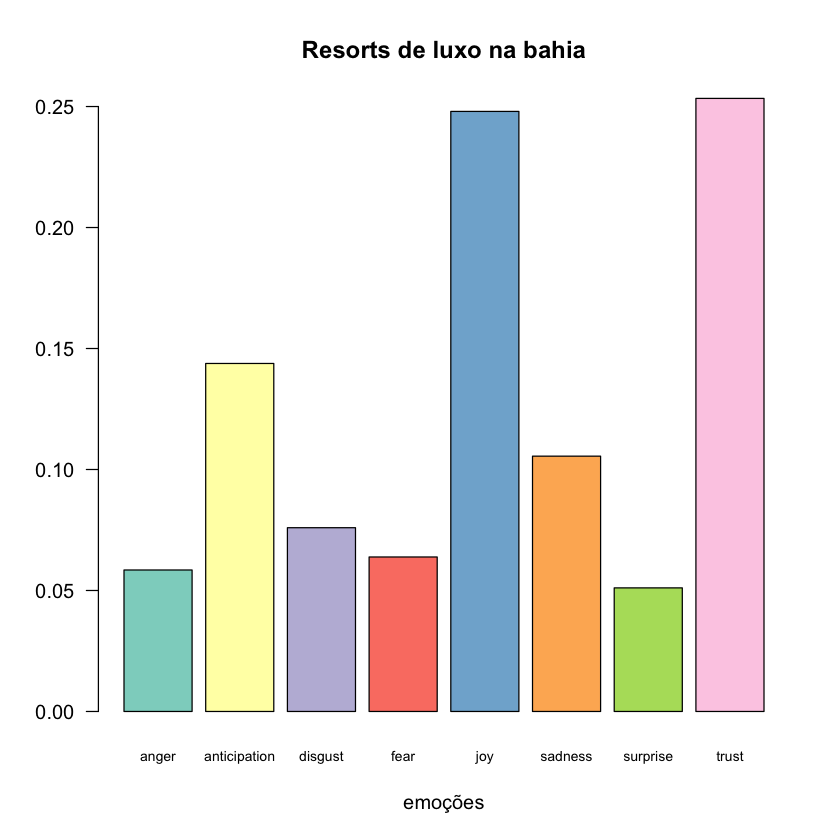

In [60]:
barplot(
colSums(prop.table(sentimentos_df[, 1:8])),
space = 0.2,
horiz = FALSE,
las = 1,
plot = TRUE,
cex.names = 0.7,
col = brewer.pal(n = 8, name = "Set3"),
main = "Resorts de luxo na bahia",
xlab= "emoções", ylab = NULL)


In [61]:
palavras_tristeza <- texto_palavras[sentimentos_df$sadness > 0]

In [62]:
palavras_tristeza_ordem <- sort(table(unlist(palavras_tristeza)), decreasing = TRUE)
head(palavras_tristeza_ordem, n = 12)



        nada          mal extremamente         ruim        final     negativo 
          16           11            7            7            6            6 
       falta     problema         pena        tarde        cheio         pior 
           5            5            4            4            3            3 

In [63]:
length(palavras_tristeza_ordem)

[1] 42

In [64]:
palavras_felizes <- texto_palavras[sentimentos_df$joy >0]

In [65]:
palavras_felizes_ordem <- sort(table(unlist(palavras_felizes)), decreasing = TRUE)
head(palavras_felizes_ordem)


compartilhar    excelente        praia        limpo  maravilhoso     perfeito 
          60           40           30           20           16           10 

In [181]:
nuvem_emocoes_vetor <- c(
paste(texto_palavras[sentimentos_df$sadness> 0], collapse = " "),
paste(texto_palavras[sentimentos_df$joy > 0], collapse = " "),
paste(texto_palavras[sentimentos_df$anger > 0], collapse = " "),
paste(texto_palavras[sentimentos_df$disgust > 0], collapse = " "),
paste(texto_palavras[sentimentos_df$fear > 0], collapse = " "))

In [182]:
nuvem_text_corpus <- Corpus(VectorSource(nuvem_emocoes_vetor))
nuvem_text_corpus <- tm_map(nuvem_text_corpus,
                                     content_transformer(function(x) iconv(x, to = 'UTF-8', sub = 'byte')))
nuvem_text_corpus <- tm_map(nuvem_text_corpus, content_transformer(tolower))
nuvem_text_corpus <- tm_map(nuvem_text_corpus, removePunctuation)
nuvem_text_corpus <- tm_map(nuvem_text_corpus,removeWords, stopwords("portuguese"))


In [183]:
nuvem_tdm <- TermDocumentMatrix(nuvem_text_corpus)
nuvem_tdm <- as.matrix(nuvem_tdm)
head(nuvem_tdm)

,1,2,3,4,5
abandonado,1,0,1,0,1
acidente,1,0,1,1,1
arrepender,2,0,0,0,0
atraso,2,0,2,2,2
caso,2,0,0,0,2
cheio,3,0,0,0,3


In [184]:
colnames(nuvem_tdm) <- c('tristeza', 'felicidade', 'raiva', 'confianca', 'desgosto')
head(nuvem_tdm)

,tristeza,felicidade,raiva,confianca,desgosto
abandonado,1,0,1,0,1
acidente,1,0,1,1,1
arrepender,2,0,0,0,0
atraso,2,0,2,2,2
caso,2,0,0,0,2
cheio,3,0,0,0,3


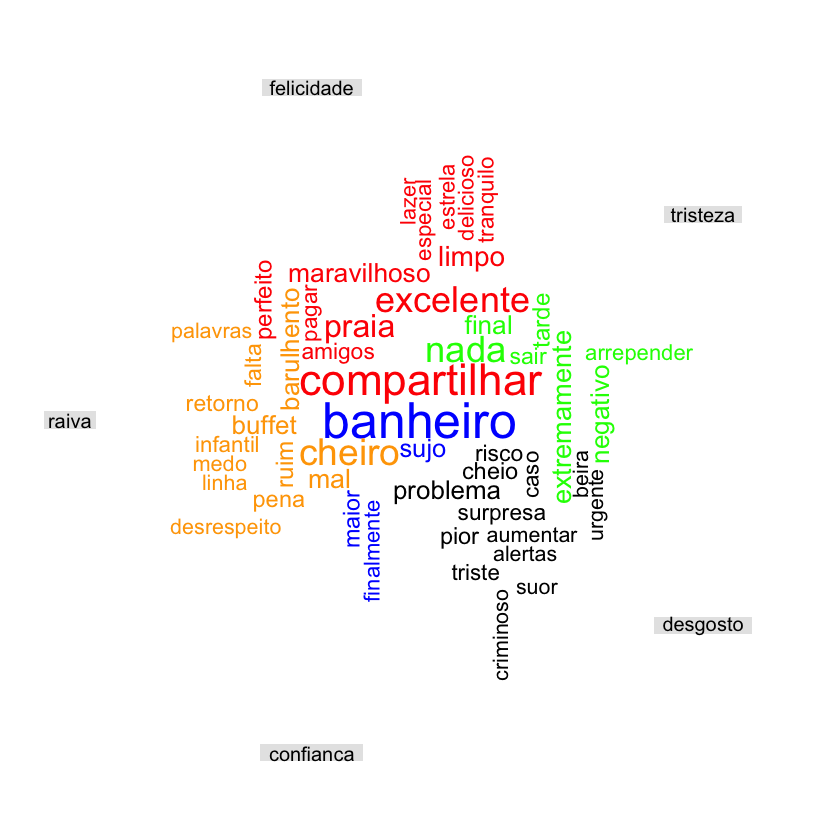

In [185]:
set.seed(757) # pode ser qualquer número
comparison.cloud(nuvem_tdm, random.order = FALSE,
                 colors = c("green", "red", "orange", "blue"),
                 title.size = 1, max.words = 50, scale = c(2.5, 1), rot.per = 0.4)

In [186]:
sentimentos_valencia <- (sentimentos_df$negative * -1) + sentimentos_df$positive

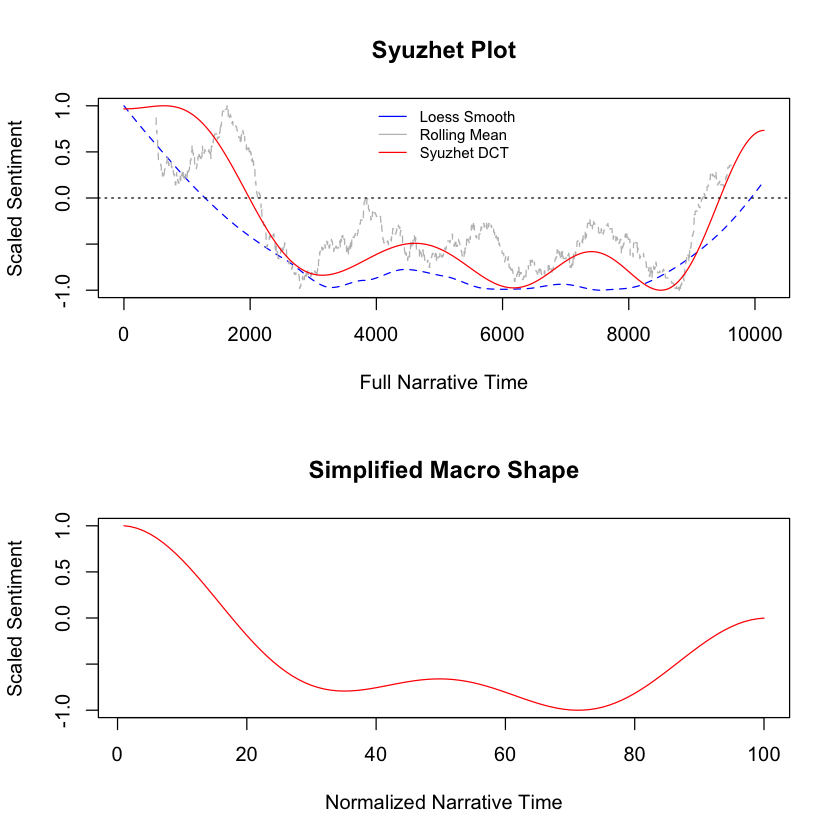

In [187]:
simple_plot(sentimentos_valencia)

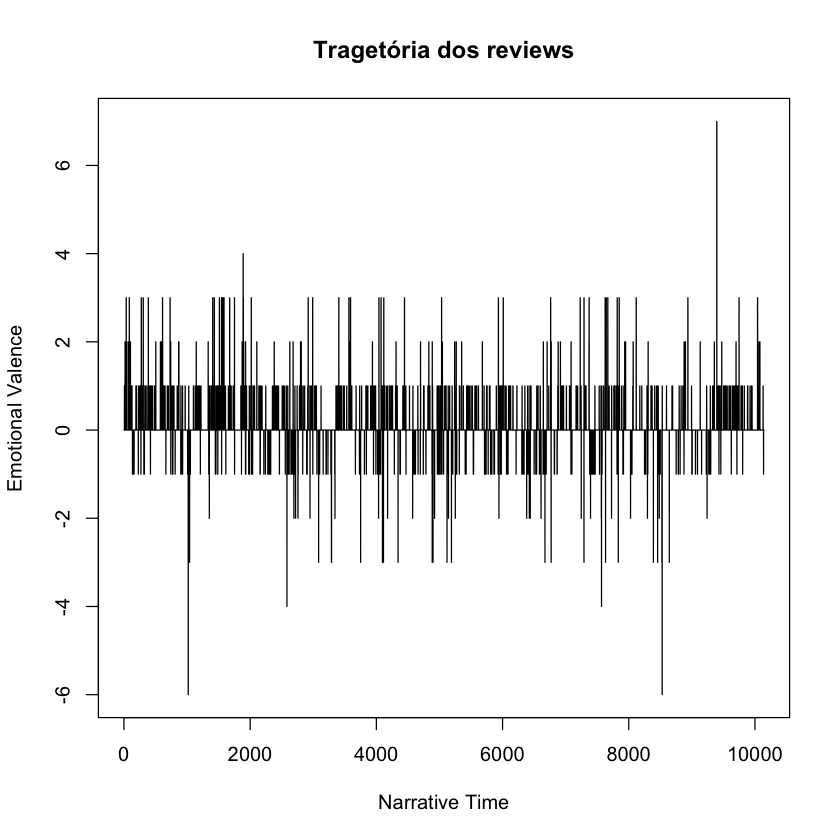

In [199]:
plot(
  sentimentos_valencia, 
  type="l", 
  main="Tragetória dos reviews", 
  xlab = "Narrative Time", 
  ylab= "Emotional Valence"
  )

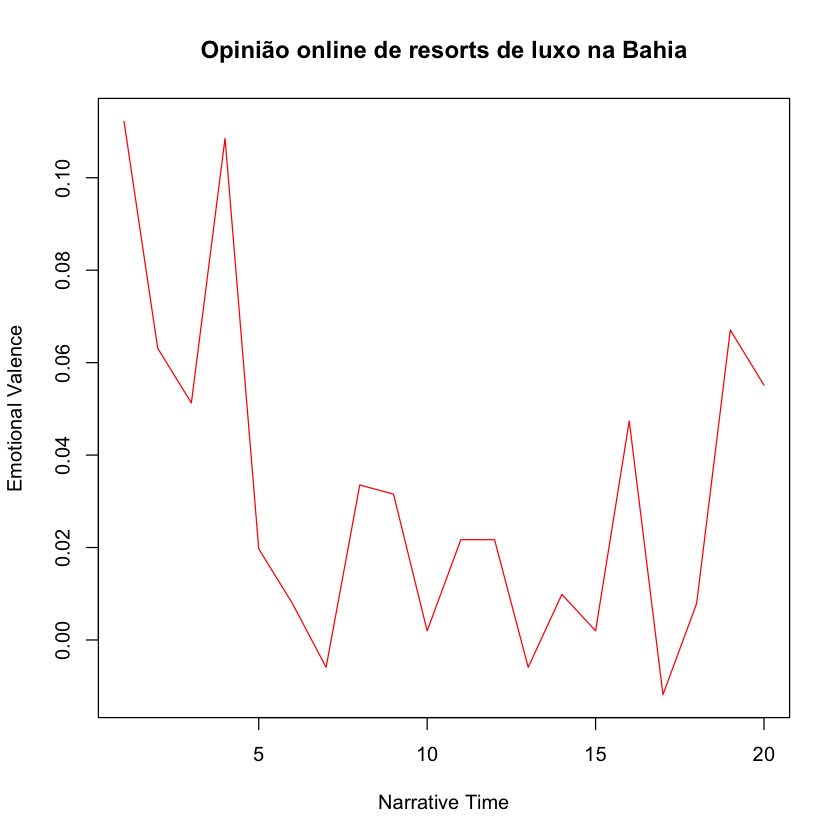

In [200]:
percent_vals <- get_percentage_values(sentimentos_valencia, bins = 20)
plot(
  percent_vals, 
  type="l", 
  main="Opinião online de resorts de luxo na Bahia", 
  xlab = "Narrative Time", 
  ylab= "Emotional Valence", 
  col="red"
  )

In [201]:
ft_values <- get_dct_transform(
      sentimentos_valencia, 
      low_pass_size = 3, 
      x_reverse_len = 100,
      scale_vals = TRUE,
      scale_range = FALSE
      )

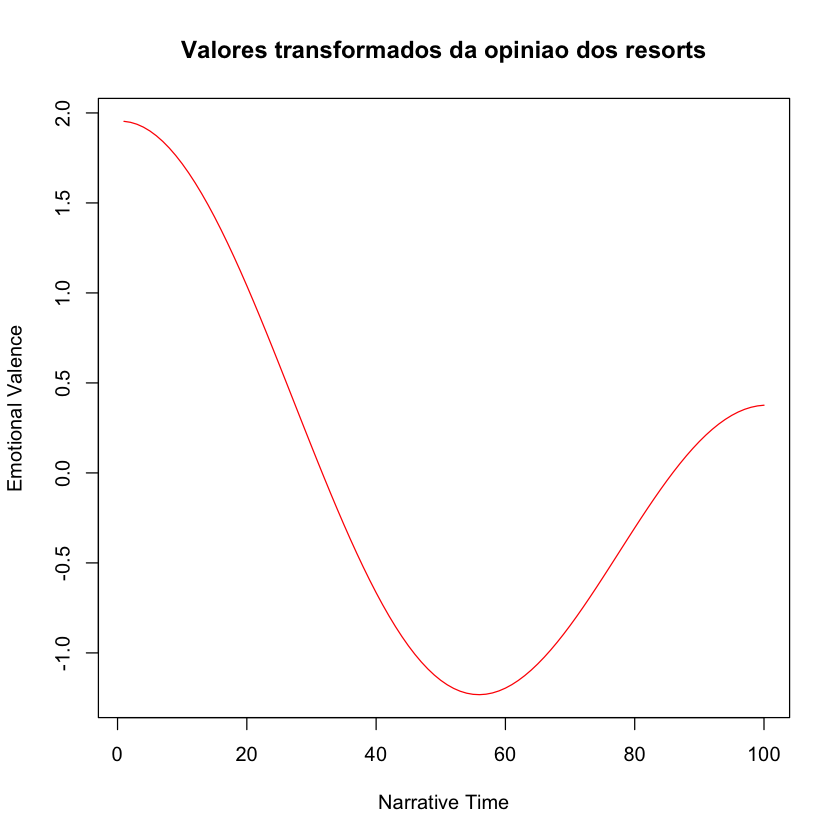

In [202]:
plot(
  ft_values, 
  type ="l", 
  main ="Valores transformados da opiniao dos resorts", 
  xlab = "Narrative Time", 
  ylab = "Emotional Valence", 
  col = "red"
  )

In [203]:
nrc_data <- get_nrc_sentiment(texto_palavras)

In [204]:
angry_items <- which(sentimentos_df$anger > 0)
texto_palavras[angry_items]

[1] "infantil"    "palavras"    "ruim"        "atraso"      "mal"        
 [6] "cheiro"      "cheiro"      "defeito"     "grade"       "quebrado"   
[11] "cheiro"      "cheiro"      "cheiro"      "cheiro"      "desrespeito"
[16] "horror"      "barulhento"  "desastre"    "imoral"      "incomodar"  
[21] "pena"        "ruim"        "barulhento"  "retorno"     "cheiro"     
[26] "mal"         "mal"         "medo"        "falta"       "ruim"       
[31] "prestativo"  "intenso"     "cheiro"      "cheiro"      "mal"        
[36] "mal"         "grave"       "mal"         "cheiro"      "pena"       
[41] "buffet"      "mal"         "falta"       "pena"        "falta"      
[46] "falta"       "abandonado"  "cheiro"      "ruim"        "buffet"     
[51] "pena"        "cheiro"      "cheiro"      "cheiro"      "medo"       
[56] "mentira"     "dinheiro"    "acidente"    "mal"         "barulhento" 
[61] "retorno"     "buffet"      "buffet"      "ruim"        "falta"      
[66] "fita"        "assalto"     "dificuldade" "ruim"        "mal"        
[71] "mal"         "barulhento"  "mal"         "atraso"      "ruim"       
[76] "infantil"    "infantil"    "linha"

In [205]:
joy_items <- which(sentimentos_df$joy > 0)
texto_palavras[joy_items]

[1] "compartilhar"  "compartilhar"  "excelente"     "limpo"        
  [5] "lazer"         "excelente"     "maravilhoso"   "trabalho"     
  [9] "trabalho"      "excelente"     "maravilhoso"   "verdade"      
 [13] "melhorar"      "amigos"        "excelente"     "perfeito"     
 [17] "compartilhar"  "compartilhar"  "excelente"     "infantil"     
 [21] "praia"         "perfeito"      "perfeito"      "maravilhoso"  
 [25] "festa"         "tipo"          "festa"         "maravilhoso"  
 [29] "excelente"     "praia"         "excelente"     "lazer"        
 [33] "sol"           "compartilhar"  "compartilhar"  "limpo"        
 [37] "limpo"         "tranquilo"     "delicioso"     "limpo"        
 [41] "tranquilo"     "compartilhar"  "compartilhar"  "maravilhoso"  
 [45] "limpo"         "sensacional"   "massagem"      "limpo"        
 [49] "bonita"        "compartilhar"  "compartilhar"  "tipo"         
 [53] "sexo"          "limpo"         "especial"      "excelente"    
 [57] "excelente"     "compartilhar"  "compartilhar"  "tranquilo"    
 [61] "excelente"     "excelente"     "tranquilo"     "delicioso"    
 [65] "compartilhar"  "compartilhar"  "maravilhoso"   "praia"        
 [69] "familiaridade" "singular"      "amigos"        "beleza"       
 [73] "maravilhoso"   "solícito"      "maravilhoso"   "maravilhoso"  
 [77] "maravilhoso"   "perfeito"      "solícitos"     "compartilhar" 
 [81] "compartilhar"  "perfeito"      "divertir"      "maravilhoso"  
 [85] "excelente"     "melhoria"      "praia"         "satisfeito"   
 [89] "brilho"        "maravilhoso"   "compartilhar"  "compartilhar" 
 [93] "seguro"        "limpo"         "excelente"     "especial"     
 [97] "excelente"     "compartilhar"  "compartilhar"  "excelente"    
[101] "trabalho"      "praia"         "excelente"     "praia"        
[105] "praia"         "excelente"     "fiesta"        "compartilhar" 
[109] "compartilhar"  "vivo"          "limpo"         "surpresa"     
[113] "gosto"         "compartilhar"  "compartilhar"  "excelente"    
[117] "praia"         "praia"         "jardim"        "compartilhar" 
[121] "compartilhar"  "amigos"        "jardim"        "excelente"    
[125] "amigos"        "promessa"      "jardim"        "lazer"        
[129] "praia"         "delicioso"     "limpo"         "excelente"    
[133] "praia"         "praia"         "praia"         "compartilhar" 
[137] "compartilhar"  "prestativo"    "especial"      "excelente"    
[141] "sorriso"       "excelente"     "excelente"     "solícitos"    
[145] "sorriso"       "intenso"       "finalmente"    "pagar"        
[149] "maioria"       "compartilhar"  "compartilhar"  "excelente"    
[153] "amigos"        "filha"         "finalmente"    "maravilhoso"  
[157] "tipo"          "praia"         "limpo"         "praia"        
[161] "praia"         "compartilhar"  "compartilhar"  "conforto"     
[165] "gosto"         "compartilhar"  "compartilhar"  "verde"        
[169] "bonita"        "excelente"     "excelente"     "excelente"    
[173] "verde"         "bonita"        "limpo"         "sabor"        
[177] "praia"         "seguro"        "nadar"         "compartilhar" 
[181] "compartilhar"  "praia"         "limpo"         "tranquilo"    
[185] "cerveja"       "pagar"         "pagar"         "pagar"        
[189] "compartilhar"  "compartilhar"  "praia"         "deslumbrante" 
[193] "sensacional"   "maravilhoso"   "praia"         "luxo"         
[197] "sol"           "praia"         "compartilhar"  "compartilhar" 
[201] "praia"         "surpresa"      "especial"      "dinheiro"     
[205] "limpo"         "limpo"         "compartilhar"  "compartilhar" 
[209] "excelente"     "excelente"     "sol"           "pagar"        
[213] "ajudar"        "praia"         "limpo"         "praia"        
[217] "compartilhar"  "compartilhar"  "excelente"     "melhorar"     
[221] "pagar"         "compartilhar"  "compartilhar"  "perfeito"     
[225] "compartilhar"  "compartilhar"  "fita"          "beleza"       
[229] "perfe

In [ ]:
pander::pandoc.table(sentimentos_df[, 1:8], split.table = Inf)

In [ ]:
pander::pandoc.table(sentimentos_df[, 9:10])

In [209]:
valence <- (sentimentos_df[, 9]*-1) + sentimentos_df[, 10]
valence

[1]  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0  2  0  0  0  0  0  0
   [25]  0  0  1  0  0  1  1  0  0  0  0  3  0  0  2  0  0  0  0  0  0  0  0  0
   [49]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
   [73]  0  0  0  1  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  2  0  0
   [97]  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0
  [121]  0  0  0  0  0  0  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  [145]  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  [169]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  [193]  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [217]  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0
  [241]  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  [265]  0  0  0  0 -1  0  0  0  0  0  3  0  0  0  1  0  0  0  0  0  0  0  0  0
  [289]  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  1  0  3  0  0  0  0  0  0
  [313]  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  0  0  0
  [337]  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0
  [361]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  [385]  0  0  3  1  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  [409]  0  0  1  0  0  0  0  0  0  0  0 -1  0  0  1  0  1  0  0  0  0  0  0  0
  [433]  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  [457]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [481]  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [505]  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [529]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [553]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [577]  1  2  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
  [601]  0  0  0  0  0  0  0  0  0  0  0  3  0  2  0  1  0  0  0  0  0  0  0  0
  [625]  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0
  [649]  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  [673]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0
  [697]  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [721]  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  2 -1  0  0
  [745]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0
  [769]  0 -1  0  0  0  0  0 -1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  [793]  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  [817]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [841]  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  [865]  0  0  2  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [889]  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0
  [913]  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0
  [937]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [961]  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  [985]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1009] -1  0  0  0  0  0  0  0  0  0 -6  0  0  0  0  0  0  0  1  0  0  0  0  0
 [1033]  0  0  0  0  0  0  0 -3 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 [1057]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1081]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 [1105]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1129]  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  2  0  0  0  0  0  0
 [1153]  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1177]  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0
 [12

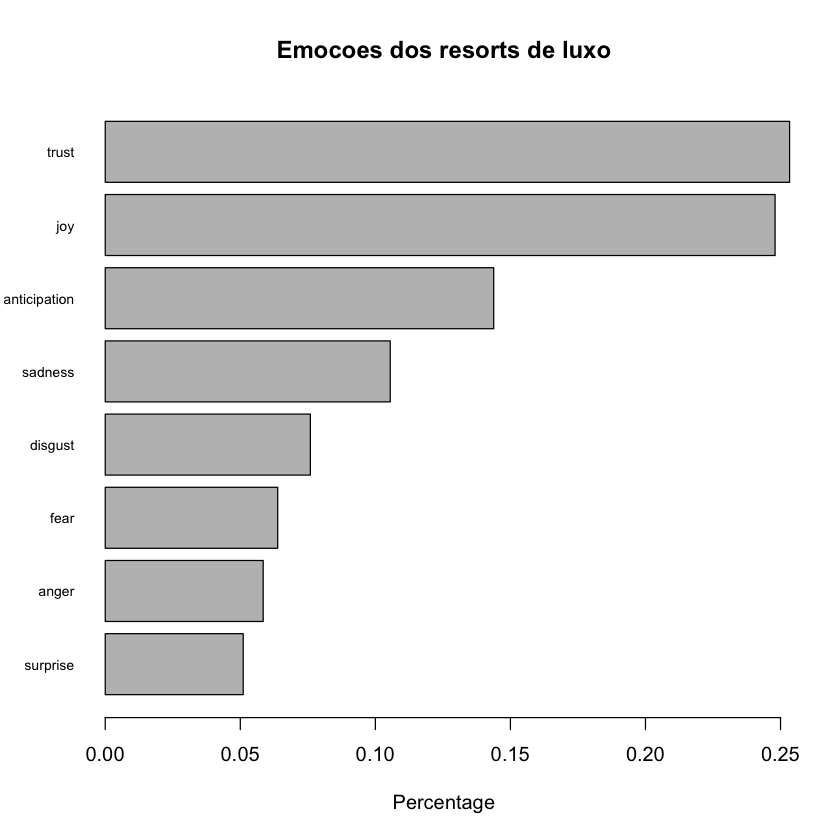

In [210]:
barplot(
  sort(colSums(prop.table(sentimentos_df[, 1:8]))), 
  horiz = TRUE, 
  cex.names = 0.7, 
  las = 1, 
  main = "Emocoes dos resorts de luxo", xlab="Percentage"
  )

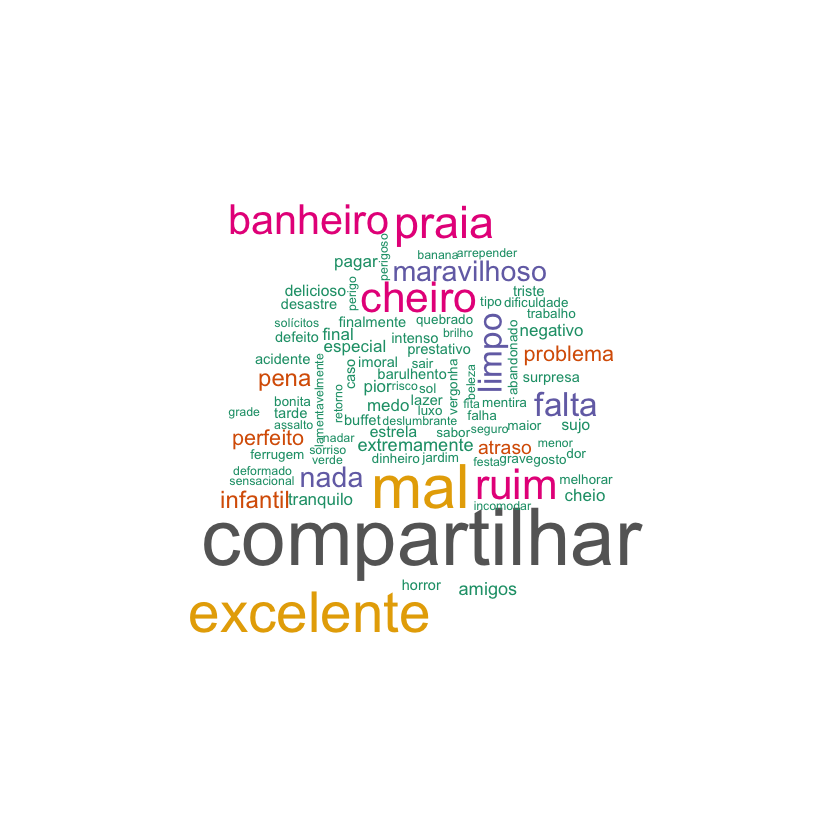

In [211]:
formatacao <- brewer.pal(8, "Dark2")

wordcloud(nuvem_text_corpus, min.freq = 2, max.words = 100, random.order = T, colors = formatacao)

In [212]:
# Limpeza do texto com a Document Term Matrix

nuvem_dtm <- DocumentTermMatrix(nuvem_text_corpus)
nuvem_dtm

<<DocumentTermMatrix (documents: 5, terms: 133)>>
Non-/sparse entries: 215/450
Sparsity           : 68%
Maximal term length: 15
Weighting          : term frequency (tf)

In [215]:
nuvem_frequencia <- colSums(as.matrix(nuvem_tdm))

length(nuvem_frequencia)

head(nuvem_frequencia, 10)

[1] 5

tristeza felicidade      raiva  confianca   desgosto 
       114        293         78        106         81

In [216]:
nuvem_frequencia <- colSums(as.matrix(nuvem_tdm))
length(nuvem_frequencia)

[1] 5

In [217]:
nuvem_frequencia <- sort(colSums(as.matrix(nuvem_tdm)), decreasing = T)
nuvem_frequencia

felicidade   tristeza  confianca   desgosto      raiva 
       293        114        106         81         78

In [218]:
# Convertendo a matriz de frequencia em dataframe para o plot

nuvem_plot <- data.frame(word = names(nuvem_frequencia), freq = nuvem_frequencia) 

In [219]:
nuvem_plot

,word,freq
,<chr>,<dbl>
felicidade,felicidade,293
tristeza,tristeza,114
confianca,confianca,106
desgosto,desgosto,81
raiva,raiva,78


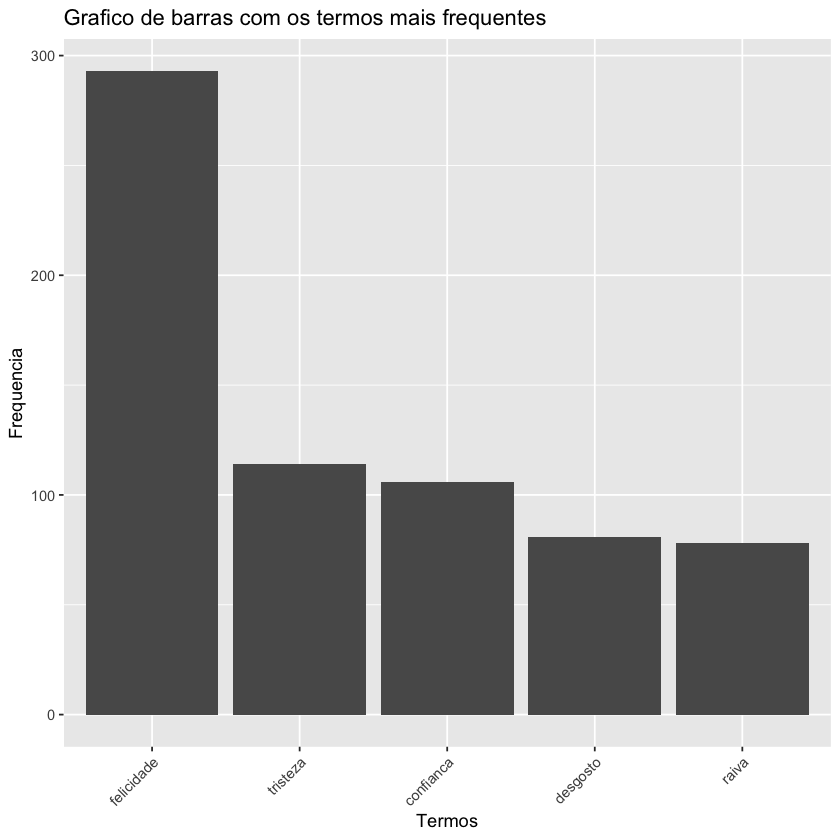

In [220]:
# Criando o grafico

grafico <- ggplot(subset(nuvem_plot, nuvem_frequencia > 30), aes(x = reorder(word, -freq), y = freq)) +
  geom_bar(stat = "identity") + 
  theme(axis.text.x = element_text(angle = 45 , hjust = 1)) +
  ggtitle("Grafico de barras com os termos mais frequentes") +
  labs(y = "Frequencia", x = "Termos")

grafico 

----------------

### Etapa 6 -  Machine Learning

In [233]:
hotel_df <- data.frame(nuvem_tdm)
hotel_df <- scale(hotel_df)
View(hotel_df)

,tristeza,felicidade,raiva,confianca,desgosto
abandonado,0.06687867,-0.3118947,0.2279950,-0.27440525,0.2755929
acidente,0.06687867,-0.3118947,0.2279950,0.06989568,0.2755929
arrepender,0.53502938,-0.3118947,-0.3233383,-0.27440525,-0.4292890
atraso,0.53502938,-0.3118947,0.7793283,0.41419660,0.9804749
caso,0.53502938,-0.3118947,-0.3233383,-0.27440525,0.9804749
cheio,1.00318009,-0.3118947,-0.3233383,-0.27440525,1.6853568
defeito,0.06687867,-0.3118947,0.2279950,0.06989568,0.2755929
deformado,0.06687867,-0.3118947,-0.3233383,0.06989568,-0.4292890
desastre,0.06687867,-0.3118947,0.2279950,0.06989568,0.2755929
desligado,0.06687867,-0.3118947,-0.3233383,-0.27440525,-0.4292890


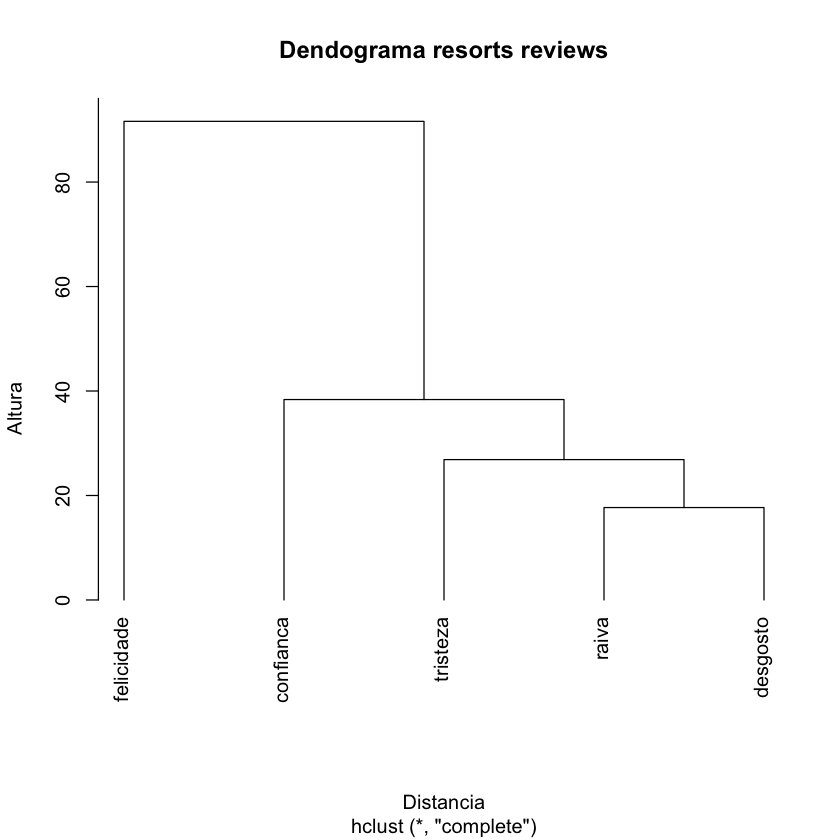

In [222]:
# Clustering 1 - Dendograma
distancia <- dist(t(nuvem_tdm), method = "euclidian")   
dendograma <- hclust(d = distancia, method = "complete")
plot(dendograma, hang = -1, main = "Dendograma resorts reviews",
     xlab = "Distancia",
     ylab = "Altura")

In [223]:
# Para ler melhor o Dendograma

clusters <- 4

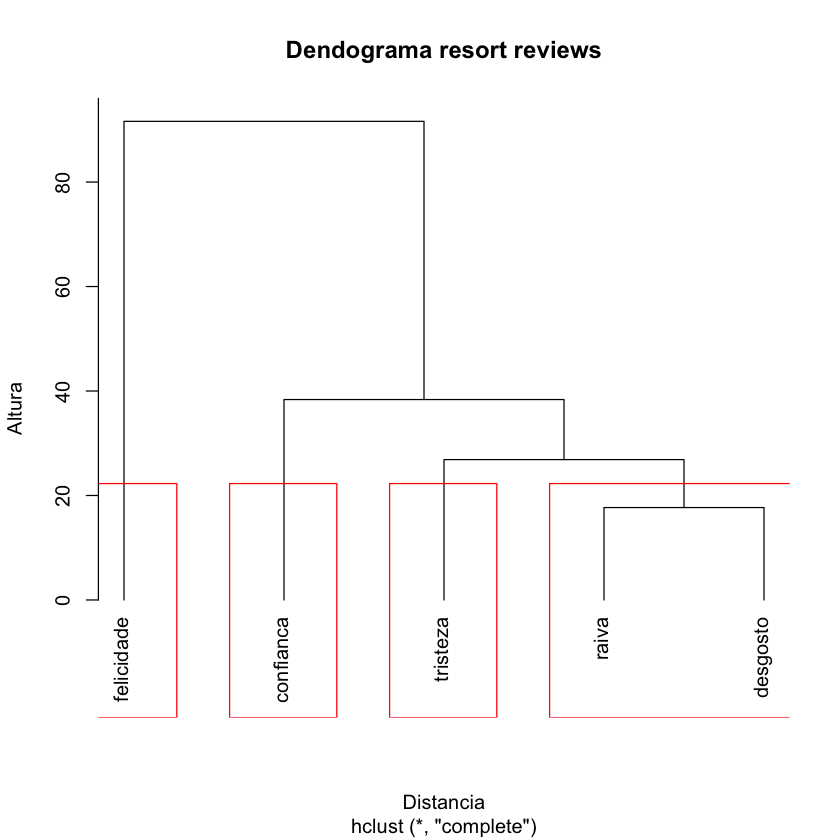

In [224]:
distancia <- dist(t(nuvem_tdm), method = "euclidian")   

dendograma <- hclust(d = distancia, method = "complete")
plot(dendograma, hang = -1, main = "Dendograma resort reviews",
     xlab = "Distancia",
     ylab = "Altura")  
groups <- cutree(dendograma, k = clusters)
rect.hclust(dendograma, k = clusters, border = "red")   

In [225]:
#Clustering 2 - K-Means

kmeans_resorts <- kmeans(distancia, 4)   

In [226]:
distancia

           tristeza felicidade    raiva confianca
felicidade 89.04493                              
raiva      26.87006   87.66413                   
confianca  38.36665   91.62423 29.15476          
desgosto   21.09502   86.67179 17.69181  32.75668

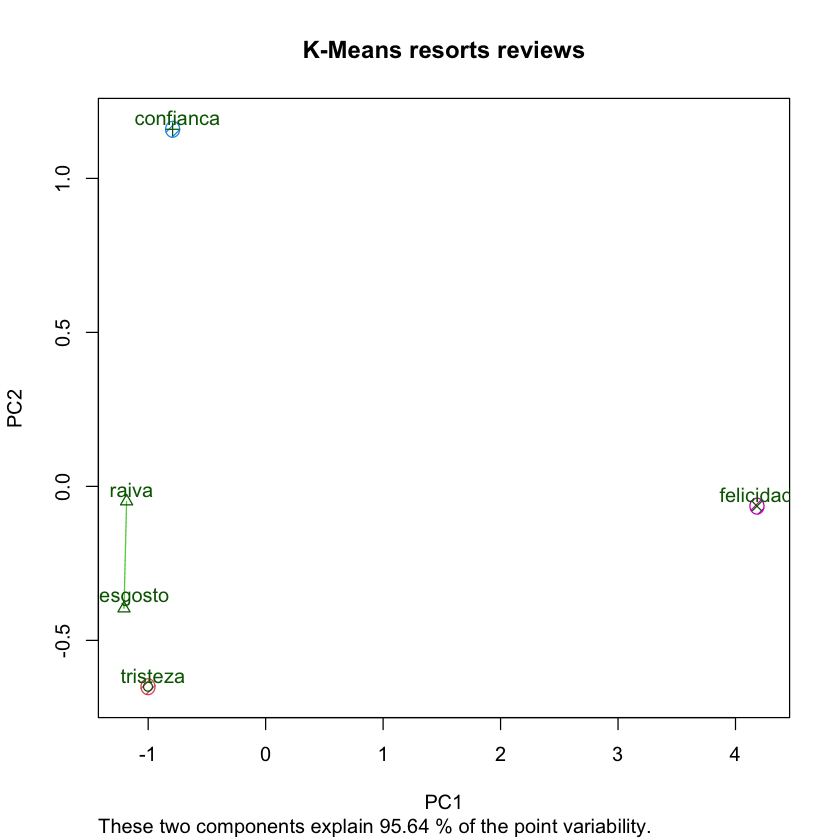

In [227]:
clusplot(as.matrix(distancia), kmeans_resorts$cluster, color = T, shade = T, labels = 3, lines = 0,
         main = "K-Means resorts reviews",
         xlab = "PC1",
         ylab = "PC2") 

In [234]:
set.seed(500)
km_rs <- kmeans(scale(hotel_df), 4, nstart = 25)

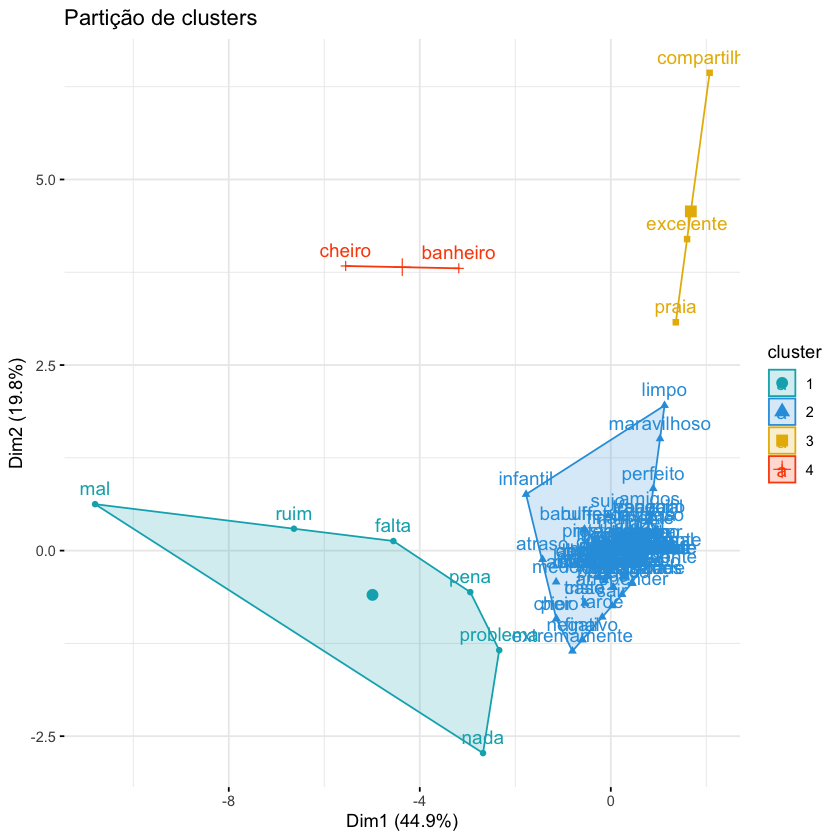

In [243]:
library("factoextra")

fviz_cluster(km_rs, data = hotel_df,
             palette = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"),
             ggtheme = theme_minimal(),
             main = "Partição de clusters"
             )

----------------

### Conclusões 

##### - Com esse estudo foi possível realizar alguns pontos de inferência estátistica a respeito dos 30 Resorts de luxo selecionados do Estado da Bahia, a análise foi feita a partir de metódos de ciência de dados utilizando recursos de coleta de dados da web, que no trabalho presente foram utilizados dados do TripAdvisor, análise de sentimentos com os dados de opiniões online dos hóspedes sobre os serviços dos resorts, seguido por uma aplicação de inteligência artificial, sendo o K-means cluster o algoritmo escolhido para fazer a classificação das avaliações. Na análise de sentimentos temos 4 variáveis que fazem uma classificação do conjunto de avaliações de todos os hóteis em felicidade, confiança, raiva, tristeza na qual podemos ver que a confiança e a felicidade tem mais tem um maior percentual em relação a raiva e a tristeza e disgosto.  